### Week 3 Linear Regression

In [9]:
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

We will explain linear regression models with Advertising dataset.

1. We import the necessary packages.

In [92]:
import pandas as pd
import numpy
import statsmodels.api as sm
import sklearn.linear_model as lm

2. We read in the datasets.

In [26]:
advertising_df = pd.read_csv('Datasets/Advertising.csv')
happiness_df = pd.read_csv('Datasets/Happiness2019.csv')

print(advertising_df.head)
print(happiness_df.head)

<bound method NDFrame.head of      Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>
<bound method NDFrame.head of      Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
2               3                    Norway  7.554           1.488   
3               4                   Iceland  7.494         

3. Run the linear regression model

In [ ]:
# Prepare the variables: dependent, independent and the constant


4. Make predictions

In [ ]:
# Use predict() to make predictions


In [ ]:
# Join it with the original dataset


In [ ]:

# There is a difference between actual sales and predicted sales

In [ ]:
# You may use sklearn to calculate mse, rmse

# RMSE

# Without squared = False, we get MSE

5. Introduce interaction terms

In [14]:
# To account for synergies between variables
# create a new variable of the interaction term
advertising_df['TVXRadio'] = advertising_df['TV']*advertising_df['radio']
advertising_df.head()

,Unnamed: 0,TV,radio,newspaper,sales,TVXRadio
0,1,230.1,37.8,69.2,22.1,8697.78
1,2,44.5,39.3,45.1,10.4,1748.85
2,3,17.2,45.9,69.3,9.3,789.48
3,4,151.5,41.3,58.5,18.5,6256.95
4,5,180.8,10.8,58.4,12.9,1952.64


In [15]:
# Prepare the variables: dependent, independent and the constant
y = advertising_df['sales']

features = ['TV', 'radio', 'TVXRadio']
X = advertising_df[features]

X_with_intercept = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X_with_intercept)
results = model.fit()

In [16]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Mon, 10 Feb 2025   Prob (F-statistic):          6.68e-146
Time:                        14:35:16   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
radio          0.0289      0.009      3.241      0.001       0.011       0.046
TVXRadio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Practice with Happiness data

In [ ]:
# Which countries are happy?
# We define that if their happiness scores are above average,
# they are happy.


In [ ]:
# Which country is the least happy


In [ ]:
# How the social and economic factors affect the happiness?
# prediction vs. inference
# A predictive question

In [27]:
happiness_df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [ ]:
# Use a linear regression model
y_happy = happiness_df['Score']

# Generate another feature
happiness_df['GDPXSocial'] = happiness_df['GDP per capita']*happiness_df['Social support']

# Add features
features_happy = ['Overall rank', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'GDPXSocial']
X_happy = happiness_df[features_happy]

# Adding an intercept to the feature matrix
X_happy_intercept = sm.add_constant(X_happy)

# Creating and fitting the model
happy_model = sm.OLS(y_happy, X_happy_intercept)
model_happy = happy_model.fit()

# View the results
model_happy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1017.
Date:                Mon, 10 Feb 2025   Prob (F-statistic):          1.36e-124
Time:                        15:08:47   Log-Likelihood:                 76.914
No. Observations:                 156   AIC:                            -135.8
Df Residuals:                     147   BIC:                            -108.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            6.7810      0.143     47.293      0.000       6.498       7.064
Overall rank                    -0.0236      0.001    -38.366      0.000      -0.025      -0.022
GDP per capita                   0.2848      0.161      1.772      0.078      -0.033       0.602
Social support                   0.3814      0.101      3.776      0.000       0.182       0.581
Healthy life expectancy         -0.0585      0.100     -0.585      0.560      -0.256       0.139
Freedom to make life choices     0.0631      0.114      0.554      0.580      -0.162       0.288
Generosity                       0.2171      0.143      1.519      0.131      -0.065       0.500
Perceptions of corruption        0.5854      0.164      3.560      0.001       0.260       0.910
GDPXSocial                      -0.2777      0.128     -2.174      0.031      -0.530      -0.025
==============================================================================
Omnibus:                       21.523   Durbin-Watson:                   0.435
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.860
Skew:                          -0.763   Prob(JB):                     1.99e-07
Kurtosis:                       4.554   Cond. No.                     1.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

4. Dummy variables

In [120]:
# Read in Kaggle Sticker Sales
sticker_df = pd.read_csv('Datasets/Kaggle_Sticker_Sales.csv')

print(sticker_df.columns)

Index(['id', 'date', 'country', 'store', 'product', 'num_sold'], dtype='object')


In [121]:
# FIRST!!! Data exploration!
# 1. Missing Value check
sticker_df.isna().sum()

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

### Fix missing values

In [96]:
# Method 1) Drop missing values
sticker_df_nona = sticker_df.dropna()
sticker_df_nona.isna().sum()

id          0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [122]:
# Method 2) Replace the missing values with the mean
sticker_df['num_sold'] = sticker_df['num_sold'].fillna(sticker_df['num_sold'].mean())

sticker_df.isna().sum()

id          0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

<Axes: xlabel='country'>

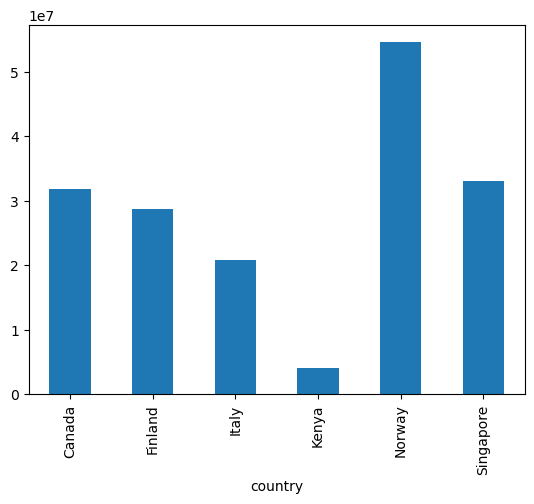

In [123]:
# More data exploration by country
sticker_df.groupby('country')['num_sold'].sum().plot(kind = 'bar')

In [124]:
print('Number of unique products: ' + str(len(sticker_df['product'].unique())))
print('Number of unique countries: ' + str(len(sticker_df['country'].unique())))
print('Number of unique stores: ' + str(len(sticker_df['store'].unique())))

print(sticker_df['product'].value_counts())
print(sticker_df['country'].value_counts())
print(sticker_df['store'].value_counts())

Number of unique products: 5
Number of unique countries: 6
Number of unique stores: 3
product
Holographic Goose     46026
Kaggle                46026
Kaggle Tiers          46026
Kerneler              46026
Kerneler Dark Mode    46026
Name: count, dtype: int64
country
Canada       38355
Finland      38355
Italy        38355
Kenya        38355
Norway       38355
Singapore    38355
Name: count, dtype: int64
store
Discount Stickers       76710
Stickers for Less       76710
Premium Sticker Mart    76710
Name: count, dtype: int64


In [125]:
# Get dummy variables for country
# Since country is categorical, have to insert argument "dtype = int" to change True/False to 0/1
sticker_df_dummy = pd.get_dummies(sticker_df, columns=['country'], drop_first = True, dtype = int)
sticker_df_dummy

# Same thing but choosing which variable to drop
#sticker_df_dummy = pd.get_dummies(sticker_df, columns=['country'], drop_first = False)
#dropped_country = 'Kenya'
#sticker_df_dummy = sticker_df_dummy.drop(columns=[dropped_country])

,id,date,store,product,num_sold,country_Finland,country_Italy,country_Kenya,country_Norway,country_Singapore
0,0,2010-01-01,Discount Stickers,Holographic Goose,752.527382,0,0,0,0,0
1,1,2010-01-01,Discount Stickers,Kaggle,973.000000,0,0,0,0,0
2,2,2010-01-01,Discount Stickers,Kaggle Tiers,906.000000,0,0,0,0,0
3,3,2010-01-01,Discount Stickers,Kerneler,423.000000,0,0,0,0,0
4,4,2010-01-01,Discount Stickers,Kerneler Dark Mode,491.000000,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
230125,230125,2016-12-31,Premium Sticker Mart,Holographic Goose,466.000000,0,0,0,0,1
230126,230126,2016-12-31,Premium Sticker Mart,Kaggle,2907.000000,0,0,0,0,1
230127,230127,2016-12-31,Premium Sticker Mart,Kaggle Tiers,2299.000000,0,0,0,0,1
230128,230128,2016-12-31,Premium Sticker Mart,Kerneler,1242.000000,0,0,0,0,1


In [126]:
sticker_df_dummy.columns

Index(['id', 'date', 'store', 'product', 'num_sold', 'country_Finland',
       'country_Italy', 'country_Kenya', 'country_Norway',
       'country_Singapore'],
      dtype='object')

In [127]:
# Fit the linear regression model
y_sticker = sticker_df['num_sold']

# Add dummy features
X_sticker = sticker_df_dummy[['country_Finland',
       'country_Italy', 'country_Kenya', 'country_Norway',
       'country_Singapore']]

# Add intercept
X_sticker_intercept = sm.add_constant(X_sticker)

# Create and fit model
model_sticker = sm.OLS(y_sticker, X_sticker_intercept)
sticker_model_country = model_sticker.fit()

# Generate results
sticker_model_country.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               num_sold   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                 2.339e+04
Date:                Mon, 10 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:46:18   Log-Likelihood:            -1.7791e+06
No. Observations:              230130   AIC:                         3.558e+06
Df Residuals:                  230124   BIC:                         3.558e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               830.3566      2.814    295.115      0.000     824.842     835.871
country_Finland     -82.1133      3.979    -20.636      0.000     -89.912     -74.314
country_Italy      -288.1152      3.979    -72.407      0.000    -295.914    -280.316
country_Kenya      -721.6464      3.979   -181.358      0.000    -729.445    -713.847
country_Norway      592.2039      3.979    148.827      0.000     584.405     600.003
country_Singapore    32.6958      3.979      8.217      0.000      24.897      40.495
==============================================================================
Omnibus:                    34168.677   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71233.556
Skew:                           0.903   Prob(JB):                         0.00
Kurtosis:                       5.041   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Get dummy variables for store

In [128]:
# Get dummy variables for store
sticker_df_dummy = pd.get_dummies(sticker_df, columns=['store'], drop_first = True, dtype = int)
sticker_df_dummy

,id,date,country,product,num_sold,store_Premium Sticker Mart,store_Stickers for Less
0,0,2010-01-01,Canada,Holographic Goose,752.527382,0,0
1,1,2010-01-01,Canada,Kaggle,973.000000,0,0
2,2,2010-01-01,Canada,Kaggle Tiers,906.000000,0,0
3,3,2010-01-01,Canada,Kerneler,423.000000,0,0
4,4,2010-01-01,Canada,Kerneler Dark Mode,491.000000,0,0
...,...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Holographic Goose,466.000000,1,0
230126,230126,2016-12-31,Singapore,Kaggle,2907.000000,1,0
230127,230127,2016-12-31,Singapore,Kaggle Tiers,2299.000000,1,0
230128,230128,2016-12-31,Singapore,Kerneler,1242.000000,1,0


In [129]:
sticker_df_dummy.columns

Index(['id', 'date', 'country', 'product', 'num_sold',
       'store_Premium Sticker Mart', 'store_Stickers for Less'],
      dtype='object')

In [130]:
# Fit the linear regression model
y_sticker = sticker_df['num_sold']

# Add dummy features
X_sticker = sticker_df_dummy[['store_Premium Sticker Mart', 'store_Stickers for Less']]

# Add intercept
X_sticker_intercept = sm.add_constant(X_sticker)

# Create and fit model
model_sticker = sm.OLS(y_sticker, X_sticker_intercept)
sticker_model_store = model_sticker.fit()

# Generate results
sticker_model_store.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               num_sold   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                 1.374e+04
Date:                Mon, 10 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:46:28   Log-Likelihood:            -1.8134e+06
No. Observations:              230130   AIC:                         3.627e+06
Df Residuals:                  230127   BIC:                         3.627e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        449.7012      2.309    194.724      0.000     445.175     454.228
store_Premium Sticker Mart   521.1751      3.266    159.574      0.000     514.774     527.576
store_Stickers for Less      387.3036      3.266    118.585      0.000     380.902     393.705
==============================================================================
Omnibus:                    48439.213   Durbin-Watson:                   1.259
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           119071.190
Skew:                           1.168   Prob(JB):                         0.00
Kurtosis:                       5.638   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Get dummy variables for Product

In [131]:
# Get dummy variables for product
sticker_df_dummy = pd.get_dummies(sticker_df, columns=['product'], drop_first = True, dtype = int)
sticker_df_dummy

,id,date,country,store,num_sold,product_Kaggle,product_Kaggle Tiers,product_Kerneler,product_Kerneler Dark Mode
0,0,2010-01-01,Canada,Discount Stickers,752.527382,0,0,0,0
1,1,2010-01-01,Canada,Discount Stickers,973.000000,1,0,0,0
2,2,2010-01-01,Canada,Discount Stickers,906.000000,0,1,0,0
3,3,2010-01-01,Canada,Discount Stickers,423.000000,0,0,1,0
4,4,2010-01-01,Canada,Discount Stickers,491.000000,0,0,0,1
...,...,...,...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,466.000000,0,0,0,0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,2907.000000,1,0,0,0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,2299.000000,0,1,0,0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,1242.000000,0,0,1,0


In [132]:
sticker_df_dummy.columns

Index(['id', 'date', 'country', 'store', 'num_sold', 'product_Kaggle',
       'product_Kaggle Tiers', 'product_Kerneler',
       'product_Kerneler Dark Mode'],
      dtype='object')

In [133]:
# Fit the linear regression model
y_sticker = sticker_df['num_sold']

# Add dummy features
X_sticker = sticker_df_dummy[['product_Kaggle',
       'product_Kaggle Tiers', 'product_Kerneler',
       'product_Kerneler Dark Mode']]

# Add intercept
X_sticker_intercept = sm.add_constant(X_sticker)

# Create and fit model
model_sticker = sm.OLS(y_sticker, X_sticker_intercept)
sticker_model_product = model_sticker.fit()

# Generate results
sticker_model_product.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               num_sold   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                 1.822e+04
Date:                Mon, 10 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:46:35   Log-Likelihood:            -1.7947e+06
No. Observations:              230130   AIC:                         3.589e+06
Df Residuals:                  230125   BIC:                         3.589e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        303.6789      2.749    110.471      0.000     298.291     309.067
product_Kaggle               928.7057      3.888    238.890      0.000     921.086     936.325
product_Kaggle Tiers         714.6652      3.888    183.832      0.000     707.046     722.285
product_Kerneler             253.5062      3.888     65.209      0.000     245.887     261.126
product_Kerneler Dark Mode   347.3653      3.888     89.352      0.000     339.746     354.985
==============================================================================
Omnibus:                    38323.228   Durbin-Watson:                   0.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           104526.216
Skew:                           0.905   Prob(JB):                         0.00
Kurtosis:                       5.761   Cond. No.                         5.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## View all summaries

In [136]:
# Country summary - Base Canada
sticker_model_country.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               num_sold   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                 2.339e+04
Date:                Mon, 10 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:49:01   Log-Likelihood:            -1.7791e+06
No. Observations:              230130   AIC:                         3.558e+06
Df Residuals:                  230124   BIC:                         3.558e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               830.3566      2.814    295.115      0.000     824.842     835.871
country_Finland     -82.1133      3.979    -20.636      0.000     -89.912     -74.314
country_Italy      -288.1152      3.979    -72.407      0.000    -295.914    -280.316
country_Kenya      -721.6464      3.979   -181.358      0.000    -729.445    -713.847
country_Norway      592.2039      3.979    148.827      0.000     584.405     600.003
country_Singapore    32.6958      3.979      8.217      0.000      24.897      40.495
==============================================================================
Omnibus:                    34168.677   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71233.556
Skew:                           0.903   Prob(JB):                         0.00
Kurtosis:                       5.041   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Product Summary - Base Holographic Goose
sticker_model_product.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               num_sold   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                 1.822e+04
Date:                Mon, 10 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:47:27   Log-Likelihood:            -1.7947e+06
No. Observations:              230130   AIC:                         3.589e+06
Df Residuals:                  230125   BIC:                         3.589e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        303.6789      2.749    110.471      0.000     298.291     309.067
product_Kaggle               928.7057      3.888    238.890      0.000     921.086     936.325
product_Kaggle Tiers         714.6652      3.888    183.832      0.000     707.046     722.285
product_Kerneler             253.5062      3.888     65.209      0.000     245.887     261.126
product_Kerneler Dark Mode   347.3653      3.888     89.352      0.000     339.746     354.985
==============================================================================
Omnibus:                    38323.228   Durbin-Watson:                   0.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           104526.216
Skew:                           0.905   Prob(JB):                         0.00
Kurtosis:                       5.761   Cond. No.                         5.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Store model summary - Base Discount
sticker_model_store.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               num_sold   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                 1.374e+04
Date:                Mon, 10 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:48:14   Log-Likelihood:            -1.8134e+06
No. Observations:              230130   AIC:                         3.627e+06
Df Residuals:                  230127   BIC:                         3.627e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        449.7012      2.309    194.724      0.000     445.175     454.228
store_Premium Sticker Mart   521.1751      3.266    159.574      0.000     514.774     527.576
store_Stickers for Less      387.3036      3.266    118.585      0.000     380.902     393.705
==============================================================================
Omnibus:                    48439.213   Durbin-Watson:                   1.259
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           119071.190
Skew:                           1.168   Prob(JB):                         0.00
Kurtosis:                       5.638   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""